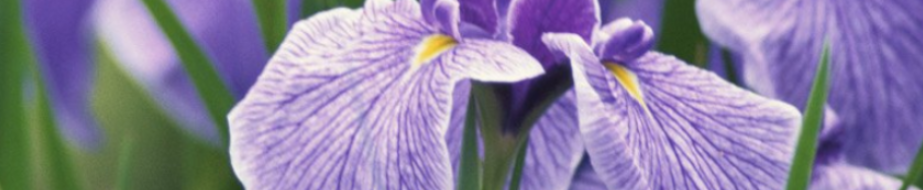

# Classifying Iris Flower Types with K-Means

I've been looking into deep learning so much recently that I've forgotten about the power of classical machine learning algorithms. This notebook will be implementing K-Means Clustering on the Iris Flower dataset! Quick notebook summary as always:

1. About the dataset
2. Data Exploration / Analysis
    * Data details 
    * Plotting Distributions
3. What is K-Means Clustering?
4. Implementation of K-Means Clustering Model
5. Predictions + model performance
6. Closing notes

## About the Dataset

The Iris flower dataset is a multiclassification problem first introduced by British statisician and biologist Ronald Fisher which lies in classifying three variations of an Iris - Iris Setosa, Iris Virginica, and Iris Versicolor. The features for this dataset are length and width of the petals and sepals and the target class of the species. 

The dataset can be found [here](http://www.kaggle.com/arshid/iris-flower-dataset). 

## Data Exploration / Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from sklearn.cluster import KMeans 

df = pd.read_csv("../input/iris-flower-dataset/IRIS.csv")

# First look at the dataset table

df.head(5)

In [ ]:
# Shape of data, # of samples working with

df.shape

Datset contains 150 samples and 5 features.

In [ ]:
# Useful info like mean, min, max for features

df.describe()

In [ ]:
# Finding null values

df.isna().sum()

In [ ]:
# Checking for class imbalance

df['species'].value_counts()

In [ ]:
# Plot distributions against features

colors = {"Iris-virginica":"purple", "Iris-setosa": "blue", "Iris-versicolor":"green"}

def showDistributions(feature1):
    plt.figure(figsize=(30,30))
    plt.subplot(6,6,1)
    plt.scatter(df[feature1], df['species'], c=df['species'].map(colors))
    plt.title("{} distribution".format(feature1))
    plt.xlabel(feature1)
    plt.ylabel('species')
    plt.show()
    
showDistributions('sepal_length')
showDistributions('petal_length')
showDistributions('sepal_width')
showDistributions('petal_width')

## What is K-Means Clustering?

K-Means clustering is an unsupervised classical machine learning algorithm that classifies targets by clusters of aggregated datapoints resulting from certain similarities within the features. As mentioned, K-Means is an unsupervised algorithm hence the model will be trying to understand the data and draw out valuable or informative features and reveal patterns within the dataset.

**How K-Means Clustering works:**  The K in K-Means clustering is actually a variable that stands for the number of centroids — points at the center of clusters. Beginning with initialization, K-Means calculates the distances between the datapoints and the number of centroids (*k*), and then groups each datapoint under the centroid that it is closest to. 

Then, the centroid is recalculated, the formula for the new centroids are as follows: 

> sum of points grouped to centroid / # of points in group

This process continues until all datapoints are grouped into their respective clusters and there is no changes in the classes of any of the datapoints.

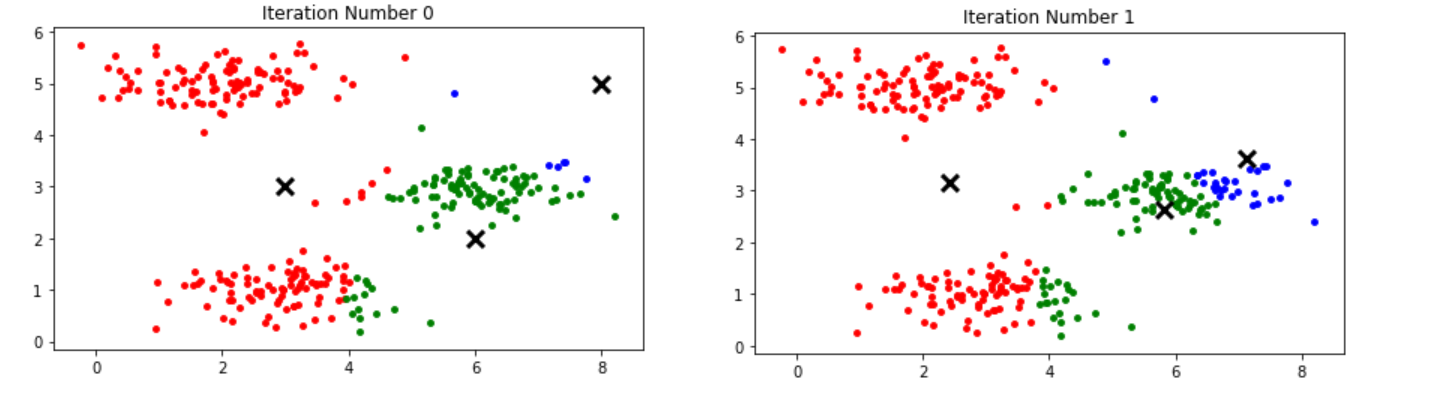

In [ ]:
x = df.drop(['species'], axis=1)
y = df['species']

In [ ]:
print("features")
print(x)
print("*****" * 10)
print("targets")
print(y)

## K-Means Clustering Model

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 500, n_init = 10, random_state = 0)
model = kmeans.fit_predict(x)

In [ ]:
# Looking at the centroid values generated

kmeans.cluster_centers_

## Model Performance

In [ ]:
species = {"Iris-versicolor": 0, "Iris-setosa": 1, "Iris-virginica": 2}

irisdf = df.copy()

irisdf["species"] = irisdf["species"].map(species)
irisdf["predicted"] = model

In [ ]:
irisdf

## Closing Notes

This is a pretty standard dataset. Not too interesting or too many patterns or insights to extract because it only has 4 features, none of which are too unique from the others. It was nice to be able to reacquaint myself with K-Means clustering though! Looking forward to implement more classical machine learning algorithms on some other datasets.

Check out some of my other notebooks: 

[Lunar Rocky Landscape Segmentation with U-Net](http://www.kaggle.com/tenzinmigmar/lunar-rocky-landscape-segmentation-with-u-net)

[Designing Convolutional Neural Networks with Fashion MNIST](http://www.kaggle.com/tenzinmigmar/fashion-mnist)

[Galaxy Multi-Image Classification with LeNet-5](https://www.kaggle.com/tenzinmigmar/galaxy-multi-image-classification-with-lenet-5)